## Tzitzikostas2014 fb analysis

In [13]:
import pickle
import pandas as pd
import string
from operator import itemgetter

### Load the data

In [14]:
loaded_data = pickle.load(file=open("tzitzikostas2014.pkl", 'rb'))

### Normalizing the data

In [15]:
df_norm = pd.io.json.json_normalize(data=loaded_data)

Get the names of the columns

In [16]:
df_norm.columns

Index(['comments.data', 'comments.summary.can_comment',
       'comments.summary.order', 'comments.summary.total_count',
       'created_time', 'id', 'likes.data', 'likes.summary.can_like',
       'likes.summary.has_liked', 'likes.summary.total_count', 'link',
       'message', 'object_id', 'shares.count', 'updated_time'],
      dtype='object')

### Select the columns that we want and then give the names we like

In [47]:
# Select only the needed columns into stage01 DataFrame
df_used = df_norm[['comments.summary.total_count', 'created_time', 'id', 'likes.summary.total_count', 'link', 
                  'message', 'object_id', 'shares.count', 'updated_time']]
# Rename the columns in place
df_used.rename(columns={'comments.summary.total_count':'comments_count', 
                        'likes.summary.total_count':'likes_count',
                       'link':'has_link', 'object_id':'has_media', 'shares.count':'shares_count'}, inplace=True)
df_used.columns

/Users/nikolaosioannou/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Index(['comments_count', 'created_time', 'id', 'likes_count', 'has_link',
       'message', 'has_media', 'shares_count', 'updated_time'],
      dtype='object')

In [ ]:
# Convert the date time columns
import dateutil.parser as dateparser
df_used['updated_time'] = df_used.updated_time.apply(dateparser.parse)
df_used['created_time'] = df_used.created_time.apply(dateparser.parse)

In [ ]:
# Convert has_link to bool_link and has_media to bool_media
df_used['bool_link'] = df_used['has_link'].isnull()
df_used['bool_media'] = df_used['has_media'].isnull()

In [ ]:
# Count the words of the message
from collections import Counter
df_used['message_length'] = df_used['message'].apply(lambda x: 0 if type(x) is float else len(x.split())) 

Populating the interactive namespace from numpy and matplotlib


array([False, True], dtype=object)

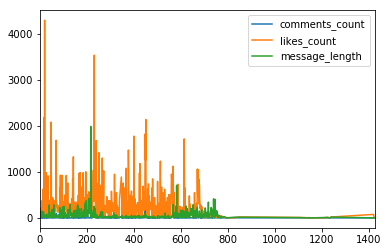

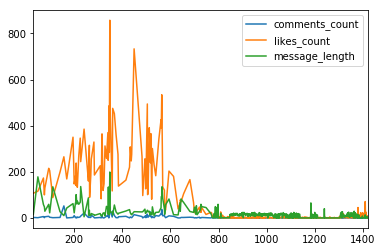

In [67]:
%pylab inline
df_grp = df_used[['bool_media', 'comments_count', 'likes_count', 'message_length']].groupby('bool_media')
df_grp[['comments_count', 'likes_count', 'message_length']].plot()
df_used['bool_media'].unique()

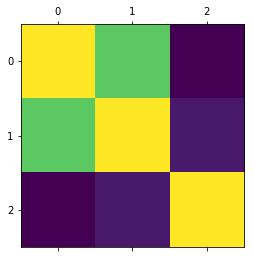

In [70]:
import matplotlib.pyplot as plt
plt.matshow(df_used[['comments_count', 'likes_count', 'message_length']].corr())

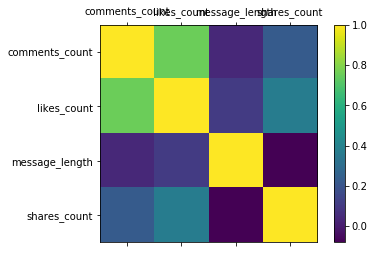

In [75]:
alpha = ['comments_count', 'likes_count', 'message_length','shares_count']

data = df_used[alpha].corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

In [ ]:
[print(len(x))  for x in stage01['comments.data'] if type(x) is not float]

In [46]:
stage02 = stage01
stage02['comments_count']=[(lambda x: 0 if type(x) is float else len(x))(x) for x in stage02['comments.data']]
stage02['likes_count']=[(lambda x: 0 if type(x) is float else len(x))(x) for x in stage02['likes.data']]b

/Users/nikolaosioannou/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/nikolaosioannou/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [49]:
stage02[['comments_count', 'likes_count']].describe()

,comments_count,likes_count
count,1423.000000,1423.000000
mean,2.852424,14.144765
std,5.748663,11.375702
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,21.000000
75%,3.000000,25.000000
max,25.000000,25.000000
